<h1><center><center><h1><h1><center><span style="color:#2189b5">Linear Regression with Multiple Variables</span><center><h1>

## In this notebook, we will implement linear regression with multiple variables to predict the prices of houses, using scikit-learn.

### Introduction :
Suppose you are selling your house and want to know what would be a good price to list it at. You have a dataset of houses with features such as the size of the house, the number of bedrooms, and the age of the house, along with their corresponding prices.

You would like to use this data to build a linear regression model that can predict the price of a house based on its features.

### This notebook contains :
The dataset for our linear regression problem. The first column is the size of the house in square feet, the second column is the number of bedrooms, and the third column is the House Age, forth column is the Price of the house.

### Task : 
Build a linear regression model to predict the price of a house based on its size and number of bedrooms, using scikit-learn.

1.Perform exploratory data analysis (EDA) to understand the dataset.<br>
2.Implement feature scaling to normalize the features.<br>
3.Use scikit-learn's LinearRegression model to fit the data and learn the parameters.<br>
4.Use the trained model to predict the price of a house with 1650 square feet and 3 bedrooms.

### Bonus Task : 
1.Implement gradient descent or normal equation to solve for the optimal parameters without using scikit-learn.<br>
2.Compare the results of the scikit-learn model with the results from the custom implementation.

# Libraries you will need :


In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math
np.set_printoptions(precision=2)

In [304]:
import warnings
warnings.simplefilter("ignore")

# The Dataset :
### Just run this code for the datasets...

In [305]:
house_sizes = [1500, 2000, 1600, 1200, 1800, 2200, 1300, 1900, 2100, 1700, 1400, 2000, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500]
bedrooms = [3, 4, 3, 2, 3, 4, 2, 4, 4, 3, 2, 4, 2, 2, 3, 3, 4, 4, 4, 5]
ages = [10, 5, 8, 15, 3, 2, 12, 6, 4, 9, 13, 7, 14, 11, 10, 8, 5, 2, 1, 6]
prices = [250000, 350000, 275000, 200000, 320000, 400000, 220000, 380000, 390000, 300000, 240000, 350000, 190000, 230000, 260000, 280000, 360000, 400000, 420000, 450000]

dff = pd.DataFrame({'Size': house_sizes, 'Bedrooms': bedrooms, 'House Age': ages, 'Price': prices})
df = dff.copy()
df

,Size,Bedrooms,House Age,Price
0,1500,3,10,250000
1,2000,4,5,350000
2,1600,3,8,275000
3,1200,2,15,200000
4,1800,3,3,320000
5,2200,4,2,400000
6,1300,2,12,220000
7,1900,4,6,380000
8,2100,4,4,390000
9,1700,3,9,300000


<h1><font color='#2189b5'> Perform exploratory data analysis (EDA) to understand the dataset.</font></h1>
<br><br>

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Size       20 non-null     int64
 1   Bedrooms   20 non-null     int64
 2   House Age  20 non-null     int64
 3   Price      20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [307]:
df.shape

(20, 4)

In [308]:
df.describe()

,Size,Bedrooms,House Age,Price
count,20.000000,20.000000,20.000000,20.000000
mean,1755.000000,3.250000,7.550000,313250.000000
std,389.973009,0.910465,4.160908,79144.687623
min,1100.000000,2.000000,1.000000,190000.000000
25%,1475.000000,2.750000,4.750000,247500.000000
50%,1750.000000,3.000000,7.500000,310000.000000
75%,2025.000000,4.000000,10.250000,382500.000000
max,2500.000000,5.000000,15.000000,450000.000000


In [309]:
df.duplicated().sum()

0

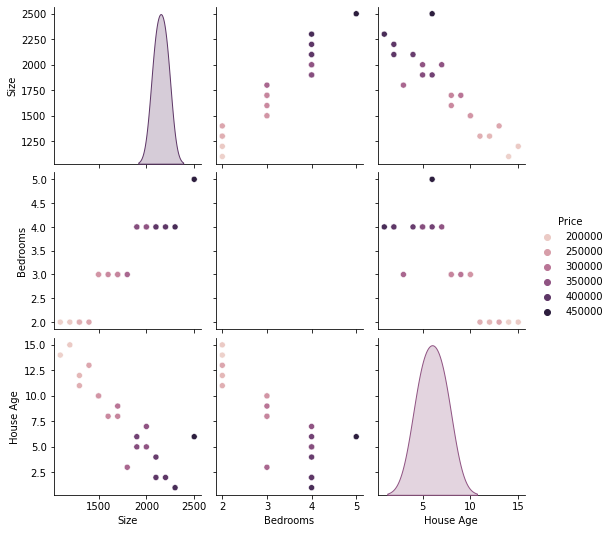

In [310]:
sns.pairplot(df, kind='scatter',hue='Price')
plt.show()

#### 1 - First understand how does each feature in the dataset effects the `price` of the house :

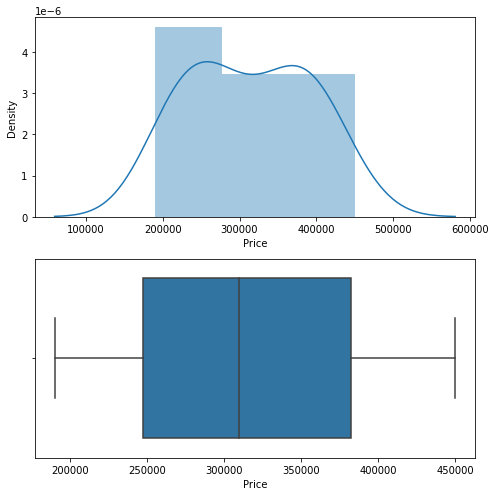

In [311]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(x=df['Price'])
plt.tight_layout()

In [312]:
df.columns

Index(['Size', 'Bedrooms', 'House Age', 'Price'], dtype='object')

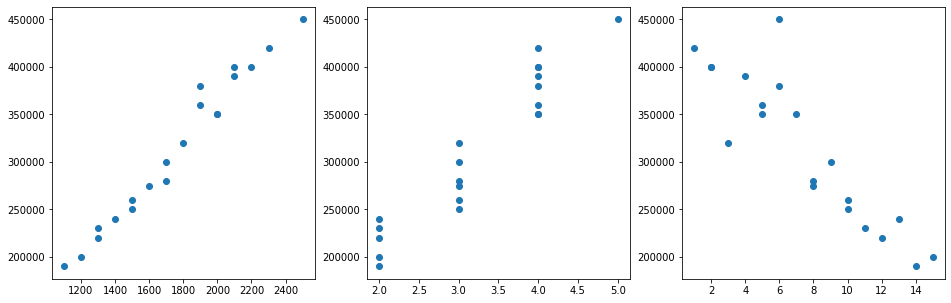

In [313]:
## 1 - Write your code here :
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,3,1)
plt.scatter(df['Size'],df['Price'])
fig.add_subplot(1,3,2)
plt.scatter(df['Bedrooms'],df['Price'])
fig.add_subplot(1,3,3)
plt.scatter(df['House Age'],df['Price'])

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use Scatter Plots ;)
</details>

<br><br>

#### 2 - Second Visualize the distribution of each of the continous features of the data :

<AxesSubplot: xlabel='Price', ylabel='Density'>

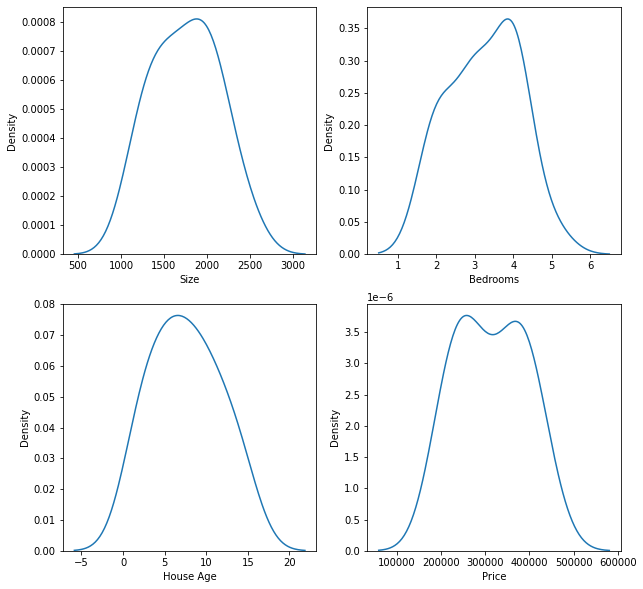

In [314]:
## 2 - Write your code here :
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
sns.kdeplot(df['Size'])
fig.add_subplot(2,2,2)
sns.kdeplot(df['Bedrooms'])
fig.add_subplot(2,2,3)
sns.kdeplot(df['House Age'])
fig.add_subplot(2,2,4)
sns.kdeplot(df['Price'])


<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use KDE Plots ;)
</details>

<br><br>

<h1><font color='#2189b5'>Briefly describe the insights you got after visualizing the data :</font></h1>
<br><br>

In [315]:
## 3 - Write what you noticed here :

"""
I not after visualizing tha data that prices is effected with size and age of the house by linear's way.
Data need to be scalling.
data features is to some extent normal distributed
No outlires.. the data is very smal:)
it is no very insights is data to make it brief:-(

"""

"\nI not after visualizing tha data that prices is effected with size and age of the house by linear's way.\nData need to be scalling.\ndata features is to some extent normal distributed\nNo outlires.. the data is very smal:)\nit is no very insights is data to make it brief:-(\n\n"

<h1><font color='#2189b5'>Look again at the dataframe then...</font></h1><br>
- Store the target variable (price) in a variable y.<br>
- Store the features in variable x.


In [316]:
# 4 - Write your code here :
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [317]:
# splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
X_test

array([[1500,    3,   10],
       [2100,    4,    2],
       [1700,    3,    8],
       [2000,    4,    5]], dtype=int64)

<h1><font color='#2189b5'>Now for data preprocessing... implement feature scaling to normalize the features. </font></h1>
<br><br>

#### there is many scaling methods found in sklearn.preprocessing 
https://scikit-learn.org/stable/modules/preprocessing.html

#### Use Scaling to scale the features (Note you only scale x) :

In [319]:
## 5 - write your code here :
# standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))


<h1><font color='#2189b5'>Based on the previous data let's build our Machine Learning model...</font></h1>
<br><br>

#### import linear regression from sklearn

In [320]:
# 6 - Write your code here :
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [321]:
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

311562.5
[52570.64 20070.79 -9620.91]


In [322]:
#predicting the test set result
y_pred = regressor.predict(X_test)

In [323]:
# put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, df.drop('Price',axis =1).columns, columns=['Coefficient'])
coeff_df

,Coefficient
Size,52570.636472
Bedrooms,20070.787165
House Age,-9620.906181


<AxesSubplot: ylabel='Density'>

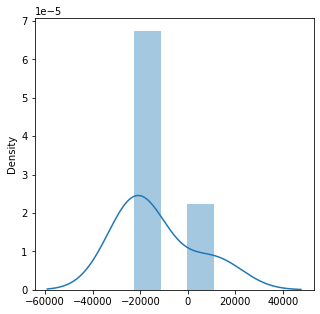

In [324]:
# visualizing residuals
fig = plt.figure(figsize=(5,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    from sklearn.linear_model import LinearRegression
</details>

<br><br>

In [325]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,250000,271994.261772
1,400000,389088.714819
2,280000,302459.695783
3,350000,369286.820293


In [326]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 18663.01575735495
MSE: 369805766.72424364
RMSE: 19230.334545302212
VarScore: 0.9433707070281049


#### Ok remember that we imported LinearRegression from sklearn, now We want to create object from this class....<br><br>Make object from LinearRegression class and name it as `lr`

In [327]:
# 7 - Write your code here :
lr = LinearRegression() 


#### Fit your linear regression model on the training data that you have, which is x and y...

In [328]:
# 8 - Write your code here :
lr.fit(X_train, y_train)


LinearRegression()

#### Let's have a look on the parameters of the model that you trained :)

In [329]:
# 9 - Write your code here :
#evaluate the model (intercept and slope)
print('intercept_: ',regressor.intercept_)
print('coef_: ', regressor.coef_) 


intercept_:  311562.5
coef_:  [52570.64 20070.79 -9620.91]


<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    to get weights use : lr.coef_ <br><br>
    to get bias use : lr.intercept_
</details>

<br><br>


<h1><font color='#2189b5'>Now your model is trained and it is now ready for making new predictions</font></h1>
<h3><font color='blue'>Note that to make new predictions you should make same scaling and preprocessing on the new test data also...</font></h3>
<br><br>

#### Use the trained model to predict the price of a house with `1650 square feet`, `3 bedrooms` and `7 years age`.

In [330]:
X_test

array([[-0.58, -0.2 ,  0.5 ],
       [ 0.89,  0.86, -1.4 ],
       [-0.09, -0.2 ,  0.03],
       [ 0.65,  0.86, -0.68]])

In [331]:
Z_test=[1650,3,7]
Z_test = np.array(Z_test).reshape(1,3)
Z_test

array([[1650,    3,    7]])

In [332]:
Z_test = s_scaler.transform(Z_test.astype(np.float))
Z_test

array([[-0.22, -0.2 , -0.21]])

In [333]:
Z_pred = regressor.predict(Z_test)
pr = pd.DataFrame({'Price Predicted:-': Z_pred}).T
pr

,0
Price Predicted:-,298270.220421


<br><br>
<h1><font color='BLUE'>BONUS Questions : </font></h1>

#### Implement gradient descent or normal equation to solve for the optimal parameters without using scikit-learn.

In [334]:
#we need to normalize the features using mean normalization
my_data = (dff - dff.mean())/dff.std()
my_data.head()

,Size,Bedrooms,House Age,Price
0,-0.653891,-0.274585,0.588814,-0.799169
1,0.628249,0.823754,-0.612847,0.464339
2,-0.397463,-0.274585,0.108149,-0.483292
3,-1.423175,-1.372924,1.790474,-1.430924
4,0.115393,-0.274585,-1.093511,0.085287


In [342]:
#setting the matrixes
X = my_data.iloc[:,0:3]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,3:4].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,4])

#set hyper parameters
alpha = 0.01
iters = 1000

In [343]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [344]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[ 1.55e-18  4.70e-01  3.38e-01 -2.08e-01]]
0.012581089432249068


Text(0.5, 1.0, 'Error vs. Training Epoch')

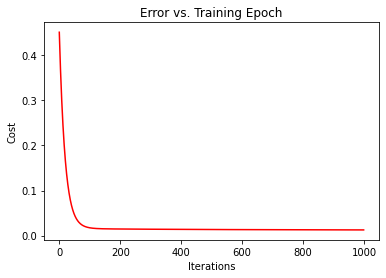

In [345]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

#### Compare the results of the scikit-learn model with the results from the custom implementation.

In [ ]:
## Write your code here : 


---------------

<h2><center><center><h2><h2><center><span style="color:#2189b5">The end</span><center><h2>

------

In [ ]:
w_init = np.array([ 1650,3, 7])
b_init = 298270.220421

In [ ]:
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [ ]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (3,), x_vec value: [ 0.89283615  0.8553372  -0.92016087]
f_wb shape (), prediction: 299739.52496078616


In [ ]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p  

In [ ]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [ ]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [ ]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 3238556265.0535965


In [255]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [282]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 51816348886.06   
Iteration  100: Cost 51810612860.37   
Iteration  200: Cost 51804877563.29   
Iteration  300: Cost 51799142994.71   
Iteration  400: Cost 51793409154.51   
Iteration  500: Cost 51787676042.58   
Iteration  600: Cost 51781943658.79   
Iteration  700: Cost 51776212003.04   
Iteration  800: Cost 51770481075.21   
Iteration  900: Cost 51764750875.19   
b,w found by gradient descent: 155.74,[ 40.04  38.97 -35.87] 
prediction: 257.83, target value: 390000
prediction: 284.72, target value: 400000
prediction: 222.41, target value: 350000
prediction: -6.66, target value: 200000
prediction: 303.10, target value: 420000
prediction: 229.58, target value: 360000
prediction: 37.27, target value: 230000
prediction: 133.43, target value: 275000
prediction: 134.77, target value: 300000
prediction: 321.26, target value: 450000
prediction: 195.74, target value: 320000
prediction: -8.01, target value: 190000
prediction: 221.07, target value: 380000
prediction: 30.10,

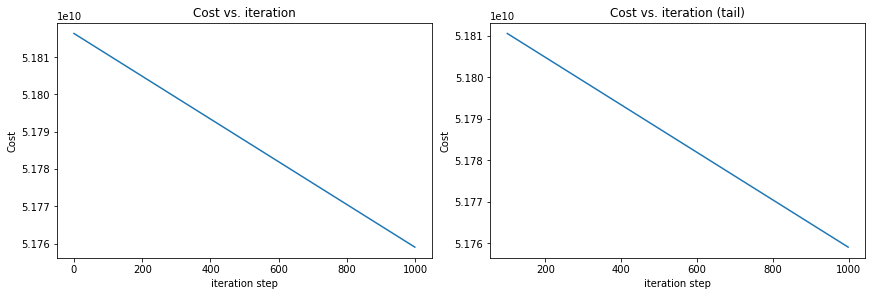

In [287]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()